#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
# Student ID: 219067763

# Student name: yuxing wang

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('clustering.csv')

df_matrix=df.values
# Class matrix
class_df=pd.DataFrame(df.Class)
class_matrix=class_df.values

# Feature matrix
feature_matrix=df.iloc[:,df.columns!='Class'].values

2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

In [2]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(feature_matrix)
    distortions.append(kmeanModel.inertia_)

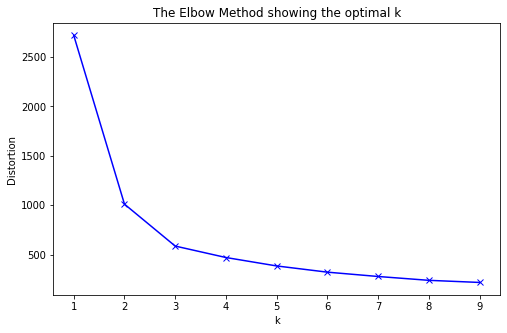

In [3]:
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The optimal numbers of clusters in this case is 3, this is because of when the point of k = 3 is reached, the degree of distortion will be greatly improved, and then slowly decrease, this critical point can be considered as a point with better clustering performance. It is same as the actual number of classes in the dataset.

3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [4]:
from sklearn import metrics

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(feature_matrix)
cluster_labels = kmeanModel.predict(feature_matrix)

def purity_score(class_matrix_true,class_matrix_pred):
    #compute contingency matrix
    contingency_matrix = metrics.cluster.contingency_matrix(class_matrix_true,class_matrix_pred)
    #return purity score
    return np.sum(np.amax(contingency_matrix,axis=0)) / np.sum(contingency_matrix)

print("purity score is: {}".format(purity_score(class_matrix,cluster_labels)))

purity score is: 0.8952380952380953


4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [5]:
#!pip install pyclustering
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

#prepare initial centers
initial_centers = kmeans_plusplus_initializer(feature_matrix,3).initialize()

In [7]:
?distance_metric

In [6]:
# Manhattan

#create metric
Manhattan_metric = distance_metric (type_metric.MANHATTAN)
#create instance
kmeans_instance = kmeans(feature_matrix,initial_centers,metric=Manhattan_metric)
#run cluster analysis and obtain results
kmeans_instance.process()

#purity score of k-means clustering 
cluster_Manhattan = kmeans_instance.predict(feature_matrix)
print("purity score is: {}".format(purity_score(class_matrix,cluster_Manhattan)))

purity score is: 0.8761904761904762


In [7]:
# Euclidean

#create metric
Euclidean_metric = distance_metric (type_metric.EUCLIDEAN)
#create instance
kmeans_instance = kmeans(feature_matrix,initial_centers,metric=Euclidean_metric)
#run cluster analysis and obtain results
kmeans_instance.process()

#purity score of k-means clustering 
cluster_Euclidean = kmeans_instance.predict(feature_matrix)
print("purity score is: {}".format(purity_score(class_matrix,cluster_Euclidean)))

purity score is: 0.8857142857142857


In [8]:
# Squared euclidean

#create metric
Squared_euclidean_metric = distance_metric (type_metric.EUCLIDEAN_SQUARE)
#create instance
kmeans_instance = kmeans(feature_matrix,initial_centers,metric=Squared_euclidean_metric)
#run cluster analysis and obtain results
kmeans_instance.process()

#purity score of k-means clustering 
cluster_Squared_euclidean = kmeans_instance.predict(feature_matrix)
print("purity score is: {}".format(purity_score(class_matrix,cluster_Squared_euclidean)))

purity score is: 0.8904761904761904


In [9]:
#Chebyshev

#create metric
Chebyshev_metric = distance_metric (type_metric.CHEBYSHEV)
#create instance
kmeans_instance = kmeans(feature_matrix,initial_centers,metric=Chebyshev_metric)
#run cluster analysis and obtain results
kmeans_instance.process()

#purity score of k-means clustering 
cluster_Chebyshev = kmeans_instance.predict(feature_matrix)
print("purity score is: {}".format(purity_score(class_matrix,cluster_Chebyshev)))

purity score is: 0.8761904761904762


In [10]:
#Minkowski

#create metric
Minkowski_metric = distance_metric (type_metric.MINKOWSKI,degree=2)
#create instance
kmeans_instance = kmeans(feature_matrix,initial_centers,metric=Minkowski_metric)
#run cluster analysis and obtain results
kmeans_instance.process()

#purity score of k-means clustering 
cluster_Minkowski = kmeans_instance.predict(feature_matrix)
print("purity score is: {}".format(purity_score(class_matrix,cluster_Minkowski)))

purity score is: 0.8857142857142857


The best distance metric is Minkowski and Euclidean because the highest purity score equal to 0.9047619047619048 among each metrics.

5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [12]:
#use chi-squared to select best 3 features
best_features1= SelectKBest(chi2, k=3).fit(feature_matrix, class_matrix) 
best_features = best_features1.transform(feature_matrix)

#kmeans model using best 3 features
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(best_features)
cluster_best1 = kmeanModel.predict(best_features)
#purity score
print("purity score is: {}".format(purity_score(class_matrix,cluster_best1)))

purity score is: 0.8952380952380953


In [13]:
#use ANOVA to select best 3 features
best_features2= SelectKBest(f_classif, k=3).fit_transform(feature_matrix,class_matrix.ravel())

#kmeans model using best 3 features
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(best_features2)
cluster_best2 = kmeanModel.predict(best_features2)
#purity score
print("purity score is: {}".format(purity_score(class_matrix,cluster_best2)))

purity score is: 0.8428571428571429


In [14]:
#chi-squared
#best features sets
best_features = best_features1.transform(feature_matrix)
df.columns[:-1][best_features1.get_support()]

Index(['height', 'length', 'max'], dtype='object')

# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

[78.9  91.81 98.68 99.62 99.89 99.98 99.99]


Text(0, 0.5, 'Variance captured')

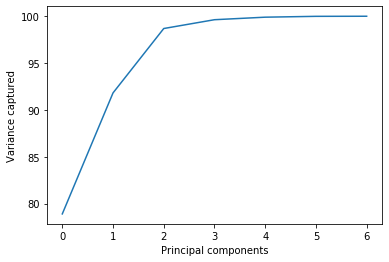

In [27]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
# Data Normalisation
feature_matrix2 = MinMaxScaler().fit_transform(feature_matrix)

# PCA model and the variance that each PC explains
pca = PCA(n_components= 7)
pca.fit(feature_matrix2)
var = pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [28]:
# At least 89% variance
pca = decomposition.PCA(n_components=0.89)
pca.fit(feature_matrix2)
print(pca.n_components_)

2


In [29]:
# At least 99% variance
pca = decomposition.PCA(n_components=0.99)
pca.fit(feature_matrix2)
print(pca.n_components_)

4


2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

In [26]:
purity_scores = []
capture_variances = []

In [31]:
# 89%
pca = decomposition.PCA(n_components=3)
new_feature = pca.fit_transform(feature_matrix2)

new_kmeans = KMeans(n_clusters = 3)
new_kmeans.fit(new_feature)
new_cluster = new_kmeans.predict(new_feature)

purity_scores.append(purity_score(class_matrix,new_cluster))
capture_variances.append(sum(pca.explained_variance_ratio_))

In [32]:
# 99%
pca = decomposition.PCA(n_components=4)
new_feature = pca.fit_transform(feature_matrix2)

new_kmeans = KMeans(n_clusters = 3)
new_kmeans.fit(new_feature)
new_cluster = new_kmeans.predict(new_feature)

purity_scores.append(purity_score(class_matrix,new_cluster))
capture_variances.append(sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'purity_scores')

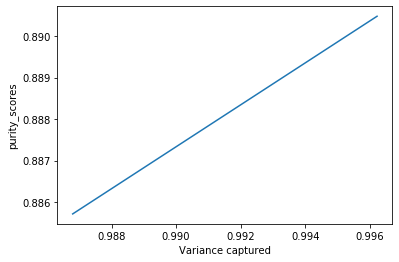

In [33]:
plt.plot(capture_variances,purity_scores)
plt.xlabel("Variance captured")
plt.ylabel("purity_scores")

3. Let's assume you have two datas ets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 


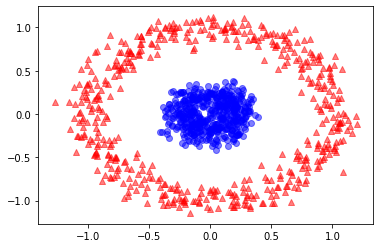

In [34]:
from sklearn.datasets import make_circles

# Prepare a set of random concentric circle data
X,y = make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)

plt.scatter(X[y ==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y ==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

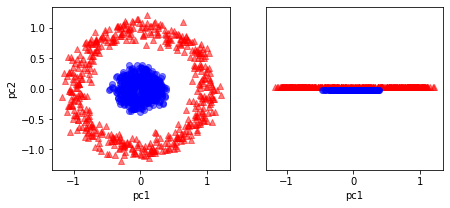

In [35]:
# Use PCA to classify concentric data
test_pca = PCA(n_components=2)
X_test = test_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_test[y==0,0],X_test[y==0,1],
             color='red',marker='^',alpha=0.5)
ax[0].scatter(X_test[y==1,0],X_test[y==1,1],
             color='blue',marker='o',alpha=0.5)

ax[1].scatter(X_test[y==0,0],np.zeros((500,1)) + 0.02,
             color='red',marker='^',alpha=0.5)
ax[1].scatter(X_test[y==1,0],np.zeros((500,1)) - 0.02,
             color='blue',marker='o',alpha=0.5)

ax[0].set_xlabel('pc1')
ax[0].set_ylabel('pc2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('pc1')

plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA
# Use KPCA to classify concentric data
kpca = KernelPCA(kernel="rbf",fit_inverse_transform=True,gamma=15)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],
             color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],
             color='blue',marker='o',alpha=0.5)

ax[1].scatter(X_kpca[y==0,0],np.zeros((500,1)) + 0.02,
             color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((500,1)) - 0.02,
             color='blue',marker='o',alpha=0.5)

ax[0].set_xlabel('pc1')
ax[0].set_ylabel('pc2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('pc1')

plt.show()

It can be seen from the above figure that pca cannot apply for the curve structure data. But we can use the kernelPCA to aplly for the curve structure data.